In [1]:
# 탐색적 데이터 분석
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
file_path = "data/drinks.csv"
drinks = pd.read_csv(file_path)

In [2]:
drinks.info()   #  info() 함수를 통해 결측(NaN) 값을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [3]:
drinks.head(10)     #  디폴트 값은 5

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [4]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [5]:
corr = drinks[["beer_servings","wine_servings"]].corr(method = "pearson")
print(corr)

beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [6]:
cols = ["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]
corr = drinks[cols].corr(method = "pearson")
corr                                                                # 상관관계

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


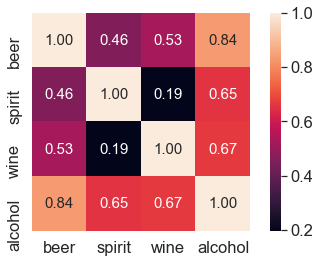

In [7]:
import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

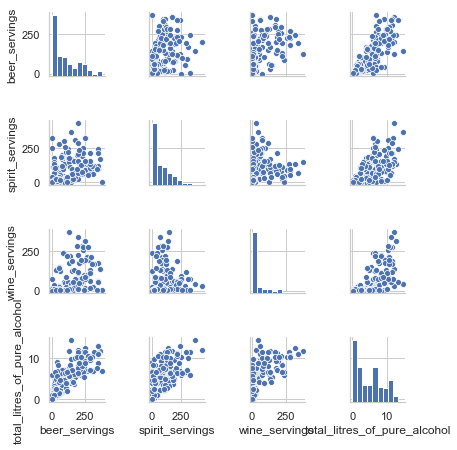

In [8]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=1.5)
plt.show()

In [9]:
# 결측 데이터 전처리
print(drinks.isnull().sum())
print("=========================================")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [10]:
# 결측데이터 채우기
drinks["continent"] = drinks["continent"].fillna("OT")  
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


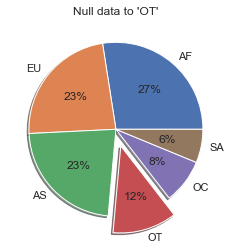

In [11]:
labels = drinks["continent"].value_counts().index.tolist()      
fracs1 = drinks["continent"].value_counts().values.tolist()     
explode = (0, 0, 0, 0.2, 0, 0)       # OT값만 튀어나오게
plt.pie(fracs1, explode=explode,  labels=labels, autopct='%.0f%%', shadow=True)
plt.title("Null data to 'OT'")
plt.show()

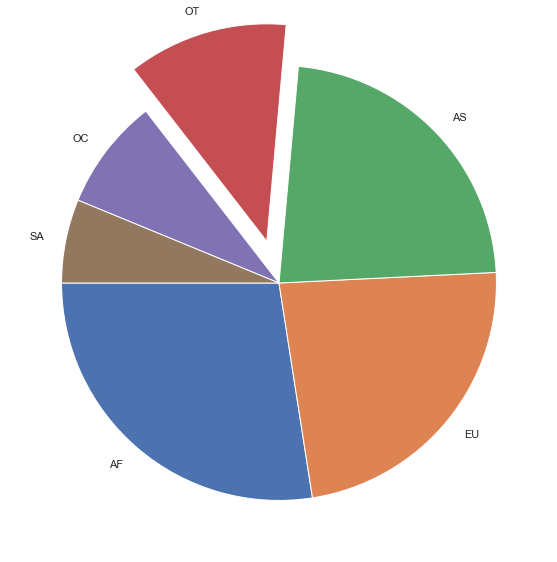

In [12]:
plt.figure(figsize=(10,10)) # 그림크기
plt.rc("font", size = 10) # 폰트크기
plt.pie(fracs1, # data, 크기순으로 정렬
        explode=explode,    # pie에서 튀어나온 요소
        labels=labels,
        colors=None,
        autopct=None,
        pctdistance=0.6,
        shadow=None,
        labeldistance=1.1,
        startangle=180, # 반시계방향 회전
        radius=None, 
        counterclock=True, 
        wedgeprops=None, 
        textprops=None, 
        center=(0, 0), 
        frame=False, 
        rotatelabels=False)        
plt.show()

In [13]:
result = drinks.groupby("continent").spirit_servings.agg(["count", "mean", "min", "max", "sum", "var", "std"]) # 그룹별로 나눠 spirit_servings 값을
result                                                                                  # agg() : 여러 함수를 동시에

,count,mean,min,max,sum,var,std
continent,,,,,,,
AF,53,16.339623,0,152,866,789.767054,28.102794
AS,44,60.840909,0,326,2677,7116.974101,84.362160
EU,45,132.555556,0,373,5965,6020.070707,77.589115
OC,16,58.437500,0,254,935,4970.929167,70.504817
OT,23,165.739130,68,438,3812,9023.837945,94.993884
SA,12,114.750000,25,302,1377,5940.931818,77.077440


In [14]:
result = drinks.groupby("continent").beer_servings.agg(["count", "mean", "min", "max", "sum", "var", "std"])
result                                                                                  

,count,mean,min,max,sum,var,std
continent,,,,,,,
AF,53,61.471698,0,376,3258,6489.561684,80.557816
AS,44,37.045455,0,247,1630,2447.253700,49.469725
EU,45,193.777778,0,361,8720,9926.449495,99.631569
OC,16,89.687500,0,306,1435,9339.562500,96.641412
OT,23,145.434783,1,285,3345,6339.529644,79.621163
SA,12,175.083333,93,333,2101,4256.628788,65.242845


In [15]:
result = drinks.groupby("continent").total_litres_of_pure_alcohol.agg(["count", "mean", "min", "max", "sum", "var", "std"])
result                                                                                  

,count,mean,min,max,sum,var,std
continent,,,,,,,
AF,53,3.007547,0.0,9.1,159.4,7.009557,2.647557
AS,44,2.170455,0.0,11.5,95.5,7.674223,2.770239
EU,45,8.617778,0.0,14.4,387.8,11.279222,3.358455
OC,16,3.381250,0.0,10.4,54.1,11.193625,3.345688
OT,23,5.995652,2.2,11.9,137.9,5.804980,2.409353
SA,12,6.308333,3.8,8.3,75.7,2.344470,1.531166


In [16]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()     # total_litres_of_pure_alcohol의 평균
total_mean

4.717098445595855

In [17]:
# total_litres_of_pure_alcohol이 평균 이상인 대륙
continent_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [18]:
# 평균 beer_servings가 가장 높은 대륙
beer_continent = drinks.groupby("continent").beer_servings.mean()
beer_continent_max = beer_continent[beer_continent == max(beer_continent)]
# beer_continent_max = beer_continent[beer_continent == beer_continent.max()]
# beer_continent.idxmax() : 큰 값의 index
beer_continent_max

continent
EU    193.777778
Name: beer_servings, dtype: float64

In [19]:
# 평균 beer_servings가 가장 낮은 대륙
beer_continent = drinks.groupby("continent").beer_servings.mean()
beer_continent_min = beer_continent[beer_continent == min(beer_continent)] 
beer_continent_min

continent
AS    37.045455
Name: beer_servings, dtype: float64

In [20]:
# 시각화 // 대륙별 spirit_serving의 평균, 최소, 최대, 합계를 시각화
result = drinks.groupby("continent").spirit_servings.agg(["mean", "min", "max", "count"])
result                                                                                  

,mean,min,max,count
continent,,,,
AF,16.339623,0,152,53
AS,60.840909,0,326,44
EU,132.555556,0,373,45
OC,58.437500,0,254,16
OT,165.739130,68,438,23
SA,114.750000,25,302,12


In [21]:
num_groups = len(result.index)
means = result["mean"].tolist()
mins = result["min"].tolist()
maxs = result["max"].tolist()
counts = result["count"].tolist()
index = np.arange(num_groups)
bar_width = 0.2


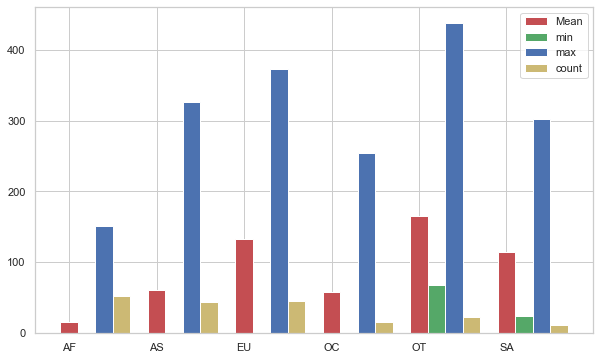

In [22]:
plt.figure(figsize=(10,6))
rects_1 = plt.bar(index, means, bar_width, color='r', label="Mean")
rects_2 = plt.bar(index+bar_width, mins, bar_width, color='g', label="min")
rects_3 = plt.bar(index+bar_width*2, maxs, bar_width, color='b', label="max")
rects_4 = plt.bar(index+bar_width*3, counts, bar_width, color='y', label="count")

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

In [23]:
# 대륙별 total_litres_of_pure_alcohol 시각화
continent_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
continents = continent_mean.index.tolist()
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA']

In [24]:
continents.append("MEAN")
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'MEAN']

In [25]:
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
alcohol

[3.00754716981132,
 2.1704545454545454,
 8.617777777777777,
 3.3812500000000005,
 5.995652173913044,
 6.308333333333334,
 4.717098445595855]

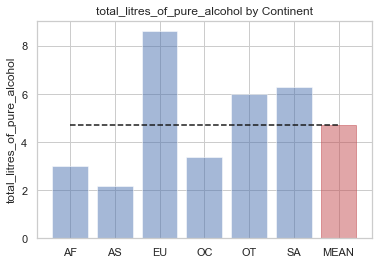

In [26]:
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5) # alpha : 1에 가까워질수록 진해진다.
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

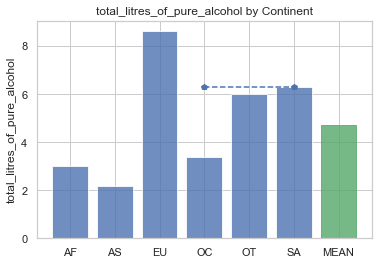

In [27]:
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.8)
bar_list[len(continents) - 1].set_color('g')
plt.plot([3., 5], [continent_mean.loc["SA"], continent_mean.loc["SA"]], "p--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [28]:
''' ############################################################'''

' ############################################################'

In [29]:
africa = drinks.loc[drinks["continent"] == "AF"]
africa  # 아프리카

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF
27,Burundi,88,0,0,6.3,AF
28,Cote d'Ivoire,37,1,7,4.0,AF
29,Cabo Verde,144,56,16,4.0,AF
31,Cameroon,147,1,4,5.8,AF
33,Central African Republic,17,2,1,1.8,AF


In [30]:
drinks["total_servings"] = drinks["beer_servings"] + drinks["spirit_servings"] + drinks["wine_servings"] + drinks["total_litres_of_pure_alcohol"]
drinks["alcohol_rate"] = drinks["total_litres_of_pure_alcohol"] / drinks["total_servings"]
drinks["alcohol_rate"] = drinks["alcohol_rate"].fillna(0)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0.0,0.000000
1,Albania,89,132,54,4.9,EU,279.9,0.017506
2,Algeria,25,0,14,0.7,AF,39.7,0.017632
3,Andorra,245,138,312,12.4,EU,707.4,0.017529
4,Angola,217,57,45,5.9,AF,324.9,0.018159
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,443.7,0.017354
189,Vietnam,111,2,1,2.0,AS,116.0,0.017241
190,Yemen,6,0,0,0.1,AS,6.1,0.016393
191,Zambia,32,19,4,2.5,AF,57.5,0.043478


In [31]:
country_rank = drinks[["country", "alcohol_rate"]]
country_rank = country_rank.sort_values(by= ["alcohol_rate"], ascending=0)  
country_rank

,country,alcohol_rate
63,Gambia,0.210526
153,Sierra Leone,0.182561
124,Nigeria,0.156627
179,Uganda,0.133226
142,Rwanda,0.131274
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


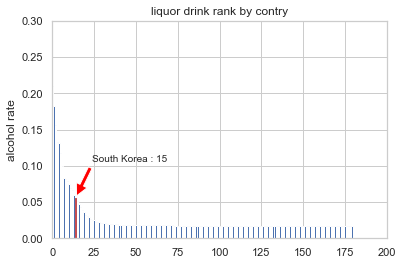

In [32]:
country_list = country_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_rank[country_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

In [33]:
# total_litres_of_pure_alcohol	평균 구하기
# 이 평균보다 적은 알코올을 섭취하는 대륙중 spirit를 가장 많이 마시는 국가를 구해보자
total_litres_of_pure_alcohol_mean = drinks["total_litres_of_pure_alcohol"].mean()
spirit_drinks = drinks[drinks["total_litres_of_pure_alcohol"] < total_litres_of_pure_alcohol_mean]
spirit_drinks[spirit_drinks["spirit_servings"] == spirit_drinks["spirit_servings"].max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
134,Philippines,71,186,1,4.6,AS,262.6,0.017517


In [48]:
spirit_drinks.loc[spirit_drinks["spirit_servings"] == spirit_drinks["spirit_servings"].max(), "beer_servings"] 


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
134,Philippines,12,186,1,4.6,AS,262.6,0.017517


In [35]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby("continent").total_litres_of_pure_alcohol.mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [36]:
continent_under_mean = continent_mean[continent_mean <= total_mean].index.tolist()
continent_under_mean

['AF', 'AS', 'OC']

In [39]:
# A[A.column_name.isin(B)] : A데이터 프레임에서 A column_name 피처가 B안에 포함되어 있는 데이터만 가져옴
df_continent_under_mean = drinks.loc[drinks.continent.isin(continent_under_mean)]
df_continent_under_mean

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate,alcoho_rate
0,Afghanistan,0,0,0,0.0,AS,0.0,0.000000,NaN
2,Algeria,25,0,14,0.7,AF,39.7,0.017632,0.017632
4,Angola,217,57,45,5.9,AF,324.9,0.018159,0.018159
8,Australia,261,72,212,10.4,OC,555.4,0.018725,0.018725
12,Bahrain,42,63,7,2.0,AS,114.0,0.017544,0.017544
...,...,...,...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC,50.9,0.017682,0.017682
189,Vietnam,111,2,1,2.0,AS,116.0,0.017241,0.017241
190,Yemen,6,0,0,0.1,AS,6.1,0.016393,0.016393
191,Zambia,32,19,4,2.5,AF,57.5,0.043478,0.043478


In [43]:
most_spirit_under_mean = df_continent_under_mean.loc[df_continent_under_mean["spirit_servings"].idxmax()]
most_spirit_under_mean

country                         Russian Federation
beer_servings                                  247
spirit_servings                                326
wine_servings                                   73
total_litres_of_pure_alcohol                  11.5
continent                                       AS
total_servings                               657.5
alcohol_rate                             0.0174905
alcoho_rate                              0.0174905
Name: 141, dtype: object